# Guided Project: Predicting Car Prices
In this guided project, I will use the k-nearest neighbors algorithm to predict car prices from 1985. The dataset that I will be using includes information about the cars such as engine displacement, weight, miles per gallon, etc. The data is available [here](https://archive.ics.uci.edu/ml/datasets/automobile). 

## Importing the data

In [3]:
import pandas as pd
import numpy as np 

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
print(cars.shape)
cars.head()


(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Since the k-nearest neighbors algorithm requires the features to be either all categorical or continuous, we will select all of the continuous variables as described by the dataset. 

In [4]:
continuous_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_features]
numeric_cars.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning the data
Looking at the dataset preview, I can see that there are missing values and need to be dealt with. It would also be a good time to normalize the data for the algorithm to work properly. 

In [5]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since I am interested in predicting price, the four rows that are missing prices should be removed. I will replace the other missing values with the column means, due to the amount missing and the total size of our data. 

In [7]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that the missing values are taken care of, it is time to normalize all the values except for the price. 

In [9]:
prices = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = prices
numeric_cars.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Models
I will start with some univariate k-nearest neighbors models.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature, target, df):
    #setting seed for reproducibility
    np.random.seed(1)
    randomindex = np.random.permutation(df.index)
    df = df.reindex(randomindex)
    halfdf = int(len(df)/2)
    train_df = df.iloc[0:halfdf]
    test_df = df.iloc [halfdf:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[[feature]], train_df[target])
    predictions = knn.predict(test_df[[feature]])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = mse ** 0.5
    return rmse

columnnames = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
univar_results = {}
for feature in columnnames:
    rmse = knn_train_test(feature, 'price', numeric_cars)
    univar_results[feature] = rmse
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(univar_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

After having an idea of how the different models predicted price, let's see the effect of the k value. 

In [11]:
def knn_train_test_k(feature, target, df):
    #setting seed for reproducibility
    np.random.seed(1)
    randomindex = np.random.permutation(df.index)
    df = df.reindex(randomindex)
    halfdf = int(len(df)/2)
    train_df = df.iloc[0:halfdf]
    test_df = df.iloc [halfdf:]
    kvalues = [1, 3, 5, 7, 9]
    diff_k_rmses = {}
    for k in kvalues:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[feature]], train_df[target])
        predictions = knn.predict(test_df[[feature]])
        mse = mean_squared_error(test_df[target], predictions)
        rmse = mse ** 0.5
        diff_k_rmses[k] = rmse 
    return diff_k_rmses

columnnames = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
univar_k_results = {}
for feature in columnnames:
    rmses = knn_train_test_k(feature, 'price', numeric_cars)
    univar_k_results[feature] = rmses
    
univar_k_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

In [12]:
def knn_train_test_k(feature, target, df):
    #setting seed for reproducibility
    np.random.seed(1)
    randomindex = np.random.permutation(df.index)
    df = df.reindex(randomindex)
    halfdf = int(len(df)/2)
    train_df = df.iloc[0:halfdf]
    test_df = df.iloc [halfdf:]
    kvalues = [1, 3, 5, 7, 9]
    diff_k_rmses = []
    for k in kvalues:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[feature]], train_df[target])
        predictions = knn.predict(test_df[[feature]])
        mse = mean_squared_error(test_df[target], predictions)
        rmse = mse ** 0.5
        diff_k_rmses.append(rmse) 
    return diff_k_rmses

columnnames = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
univar_k_results_list = []
for feature in columnnames:
    rmses = knn_train_test_k(feature, 'price', numeric_cars)
    univar_k_results_list.append(rmses)

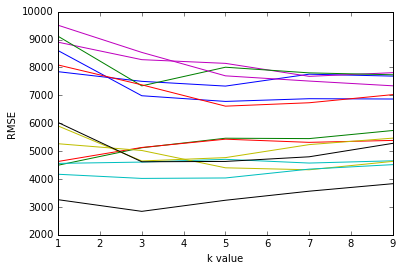

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline 

for y in univar_k_results_list:
    x = [1,3,5,7,9]
    y = y
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

As we can see, the effects of varying k values (1,3,5,7,9) on different features. Now, I will check which features are the most relevant by taking the mean of the RMSEs from the different k values.

In [14]:
univar_k_means = {}
for key, val in univar_k_results.items():
    rmsemean = np.mean(list(val.values()))
    univar_k_means[key] = rmsemean

#convert dict to series to be able to sort values
univar_k_means_series = pd.Series(univar_k_means)
univar_k_means_series.sort_values()

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [15]:
#knn_train_test function from earlier modified to accept a list of column names.
def knn_train_test(features, target, df):
    #setting seed for reproducibility
    np.random.seed(1)
    randomindex = np.random.permutation(df.index)
    df = df.reindex(randomindex)
    halfdf = int(len(df)/2)
    train_df = df.iloc[0:halfdf]
    test_df = df.iloc [halfdf:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[features], train_df[target])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = mse ** 0.5
    return rmse

In [16]:
listoffeatures=['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height']
initlist = []
multivar_rmse = []
for feature in listoffeatures:
    initlist.append(feature)
    features = initlist
    rmse = knn_train_test(features, 'price', numeric_cars)
    multivar_rmse.append(rmse)
    
multivar_rmse

[3238.4628296477176,
 2949.8817277180374,
 3580.7376651928435,
 3487.340917327035,
 3410.2170133901805,
 3478.510890118539,
 3359.9444892279203,
 3647.155382671067,
 3817.601111682675,
 3759.8309835090267,
 3736.793392975076,
 3749.3958361631585,
 3696.005611949792,
 3726.6377183145073]

Based on the results of the last cell, 'engine-size' and 'horsepower' were the features that gave predicted prices closest to the observed prices. Now that I have an idea of the relevant features, let's take the top five groups of features (two, one, five, six, four feature(s)) and tune the k value.    

In [17]:
def knn_train_test_k(features, target, df):
    #setting seed for reproducibility
    np.random.seed(1)
    randomindex = np.random.permutation(df.index)
    df = df.reindex(randomindex)
    halfdf = int(len(df)/2)
    train_df = df.iloc[0:halfdf]
    test_df = df.iloc [halfdf:]
    kvalues = list(range(1,26))
    diff_k_rmses = {}
    for k in kvalues:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[features], train_df[target])
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[target], predictions)
        rmse = mse ** 0.5
        diff_k_rmses[k] = rmse 
    return diff_k_rmses

In [18]:
krange = list(range(1,26))

multivar_k_results = {}

one_feat = ['engine-size']
rmse_val = knn_train_test_k(one_feat, 'price', numeric_cars)
multivar_k_results['one_feat'] = rmse_val

two_feat = ['engine-size', 'horsepower']
rmse_val = knn_train_test_k(two_feat, 'price', numeric_cars)
multivar_k_results['two_feat'] = rmse_val

four_feat = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test_k(four_feat, 'price', numeric_cars)
multivar_k_results['four_feat'] = rmse_val

five_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test_k(five_feat, 'price', numeric_cars)
multivar_k_results['five_feat'] = rmse_val

six_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = knn_train_test_k(six_feat, 'price', numeric_cars)
multivar_k_results['six_feat'] = rmse_val

multivar_k_results


{'five_feat': {1: 2824.7061233282866,
  2: 2915.6731645496975,
  3: 3012.4204546509704,
  4: 3202.8876051367483,
  5: 3410.2170133901805,
  6: 3618.4509432660384,
  7: 3622.6290209234803,
  8: 3848.635835654326,
  9: 3977.8149139381726,
  10: 3994.8132211260104,
  11: 4159.843526607947,
  12: 4294.3389473154875,
  13: 4380.848359486949,
  14: 4466.368754416089,
  15: 4522.420711094978,
  16: 4536.427578452413,
  17: 4587.098443664006,
  18: 4622.107837952761,
  19: 4612.890107622797,
  20: 4632.693976139521,
  21: 4712.917548435062,
  22: 4676.301064518744,
  23: 4691.189310956096,
  24: 4755.990767231825,
  25: 4804.323266214411},
 'four_feat': {1: 2952.725686581471,
  2: 3131.704952720018,
  3: 3129.692821910155,
  4: 3241.4320776448717,
  5: 3487.340917327035,
  6: 3637.0381471429987,
  7: 3606.195077860286,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293,
  11: 4162.564050411074,
  12: 4289.486490995821,
  13: 4368.061602779942,
  14: 4416.304772968801,
  

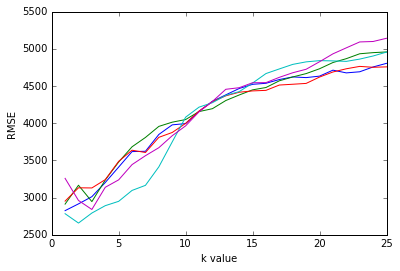

In [19]:
for key, val in multivar_k_results.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

Based on what was learned from above, the best combination of features and k is two features (engine-size and horsepower) and k=3. However, I would be worried about the low k as it could overfit the data. In the previous cells, I have been using test/train validation, let's see if k-fold cross validation changes anything.  

In [37]:
from sklearn.model_selection import cross_val_score, KFold

def k_fold_cross_val(folds, features, target, df):
    kf = KFold(folds, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, X=df[features], y=df[target], scoring='neg_mean_squared_error', cv=kf)
    absmse = [abs(x) for x in mses]
    rootmse = [x**0.5 for x in absmse]
    avg_rmse = np.mean(a=rootmse)
    return avg_rmse

In [35]:
kfold_avg_rmses = {} 
one_feat = ['engine-size']
rmse_val = k_fold_cross_val(5, one_feat, 'price', numeric_cars)
kfold_avg_rmses['one_feat'] = rmse_val

two_feat = ['engine-size', 'horsepower']
rmse_val = k_fold_cross_val(5, two_feat, 'price', numeric_cars)
kfold_avg_rmses['two_feat'] = rmse_val

four_feat = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_val = k_fold_cross_val(5, four_feat, 'price', numeric_cars)
kfold_avg_rmses['four_feat'] = rmse_val

five_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = k_fold_cross_val(5, five_feat, 'price', numeric_cars)
kfold_avg_rmses['five_feat'] = rmse_val

six_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = k_fold_cross_val(5, six_feat, 'price', numeric_cars)
kfold_avg_rmses['six_feat'] = rmse_val
    
kfold_avg_rmses

{'five_feat': 3066.296347623949,
 'four_feat': 3096.2874381752654,
 'one_feat': 3169.886194196555,
 'six_feat': 3301.9381994490313,
 'two_feat': 2991.768447200282}

In [36]:
kfold_avg_rmses = {} 
one_feat = ['engine-size']
rmse_val = k_fold_cross_val(10, one_feat, 'price', numeric_cars)
kfold_avg_rmses['one_feat'] = rmse_val

two_feat = ['engine-size', 'horsepower']
rmse_val = k_fold_cross_val(10, two_feat, 'price', numeric_cars)
kfold_avg_rmses['two_feat'] = rmse_val

four_feat = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_val = k_fold_cross_val(10, four_feat, 'price', numeric_cars)
kfold_avg_rmses['four_feat'] = rmse_val

five_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = k_fold_cross_val(10, five_feat, 'price', numeric_cars)
kfold_avg_rmses['five_feat'] = rmse_val

six_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = k_fold_cross_val(10, six_feat, 'price', numeric_cars)
kfold_avg_rmses['six_feat'] = rmse_val
    
kfold_avg_rmses

{'five_feat': 3031.8000284536897,
 'four_feat': 3010.436378520319,
 'one_feat': 3043.5029272033166,
 'six_feat': 3218.824457077312,
 'two_feat': 2808.4983984193304}

In [38]:
def k_fold_cross_val(folds, features, target, df):
    kf = KFold(folds, shuffle=True, random_state=1)
    kvalues = [1, 3, 5, 7, 9]
    rmse_dict = {}
    for k in kvalues:
        knn = KNeighborsRegressor(n_neighbors = k)
        mses = cross_val_score(knn, X=df[features], y=df[target], scoring='neg_mean_squared_error', cv=kf)
        absmse = [abs(x) for x in mses]
        rootmse = [x**0.5 for x in absmse]
        avg_rmse = np.mean(a=rootmse)
        rmse_dict[k] = avg_rmse
    return rmse_dict

In [41]:
kfold_avg_rmses = {} 
one_feat = ['engine-size']
rmse_val = k_fold_cross_val(10, one_feat, 'price', numeric_cars)
kfold_avg_rmses['one_feat'] = rmse_val

two_feat = ['engine-size', 'horsepower']
rmse_val = k_fold_cross_val(10, two_feat, 'price', numeric_cars)
kfold_avg_rmses['two_feat'] = rmse_val

four_feat = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_val = k_fold_cross_val(10, four_feat, 'price', numeric_cars)
kfold_avg_rmses['four_feat'] = rmse_val

five_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = k_fold_cross_val(10, five_feat, 'price', numeric_cars)
kfold_avg_rmses['five_feat'] = rmse_val

six_feat = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = k_fold_cross_val(10, six_feat, 'price', numeric_cars)
kfold_avg_rmses['six_feat'] = rmse_val
    
kfold_avg_rmses

{'five_feat': {1: 2387.989701944437,
  3: 2609.842548929667,
  5: 3031.8000284536897,
  7: 3259.3832024265203,
  9: 3330.080256269958},
 'four_feat': {1: 2537.612499640613,
  3: 2686.3377112775206,
  5: 3010.436378520319,
  7: 3201.518068421089,
  9: 3356.0688456120856},
 'one_feat': {1: 3601.796747005582,
  3: 3054.4418955900487,
  5: 3043.5029272033166,
  7: 3346.5514089712806,
  9: 3496.675612958266},
 'six_feat': {1: 2354.4436952469437,
  3: 2877.7932543357833,
  5: 3218.824457077312,
  7: 3442.5204334666946,
  9: 3517.7587575583143},
 'two_feat': {1: 2844.6738023575053,
  3: 2636.5883949955796,
  5: 2808.4983984193304,
  7: 2934.275309828578,
  9: 3205.8876254263178}}